In [3]:
%pip install pyalex 

import pandas as pd
from pyalex import Works, Authors, Sources, Institutions, Concepts, Funders
import pyalex
import matplotlib.pyplot as plt
import math
import numpy as np

# pyalex.config.email = "your@email.address"
pyalex.config.email = "zhmuler@gmail.com"

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Open Alex 総採録数
print(f"OpenAlexに収録されている論文数は　{Works().count():,}　件")
print(f"研究者数は　{Authors().count():,}　件")
print(f"機関数は　{Institutions().count():,}　件")
print(f"雑誌数は　{Sources().count():,}　件")
print(f"出資機関数　{Funders().count():,}　件")
print(f"Topic数は　{Concepts().count():,}　")


OpenAlexに収録されている論文数は　248,980,705　件
研究者数は　90,278,783　件
機関数は　107,447　件
雑誌数は　251,627　件
出資機関数　32,437　件
Topic数は　65,073　


# 論文のデータ

In [56]:
year_range = range(1950, 2024)
num_publish = [Works().filter(publication_year=i).select(["id"]).count() for i in year_range] # 2023年までに発行された論文を取得
num_publish_gold = [Works().filter(publication_year=i, oa_status='gold').count() for i in year_range]
num_publish_green = [Works().filter(publication_year=i, oa_status='green').count() for i in year_range]

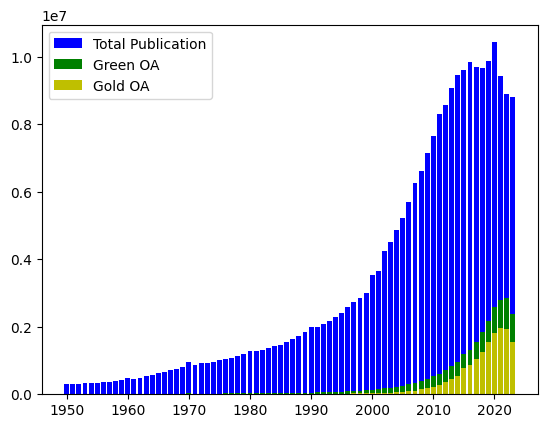

In [63]:
from scipy.optimize import curve_fit

x = np.arange(year_range[0], year_range[-1]+1)

# # 直線の方程式を定義します
# def linear_func(x, m, b):
#     return m * x + b
# # 最小二乗法を使用してパラメータをフィットします
# params, covariance = curve_fit(linear_func, x, np.log(num_publish))
# m_fit, b_fit = params

# # 確率密度関数を定義します
# def power_law(x, alpha, xmin):

#     return math.exp(xmin)*math.exp(alpha*x)
#     # return (alpha - 1) / xmin * (x / xmin) ** (-alpha)

# m_fit, b_fit = 2,2
# plt.plot(x, power_law(x, m_fit,b_fit),'--',c='black', linewidth=1, label='Power Law Fit')
# print("傾き (m):", m_fit)
# print("切片 (b):", b_fit)

bar_width = 0.8
# 全人口のバーをプロット
plt.bar(x, num_publish, width=bar_width, color='b', label='Total Publication')

# 子供と高齢者の積み上げグラフをプロット
plt.bar(x, num_publish_green, width=bar_width, color='g', label='Green OA', bottom=num_publish_gold)
plt.bar(x, num_publish_gold, width=bar_width, color='y', label='Gold OA')
plt.legend()
plt.show()

In [30]:
# 分野ごと論文数(1970と2010を比較)
# Works().random()["primary_topic"] # filter(topic=)
Concepts().get()

pd.read_csv("fields.csv")

for i in range(11,37):
    
    Works().filter(primary_topic={"field":{"id":i}}).count()
# for i in Works().filter(publication_year=1900)
# primary_topic.domain.id, primary_topic.field.id, primary_topic.id, primary_topic.subfield.id,

[{'id': 'https://openalex.org/C41008148',
  'wikidata': 'https://www.wikidata.org/wiki/Q21198',
  'display_name': 'Computer science',
  'level': 0,
  'description': 'study of computation',
  'works_count': 86745735,
  'cited_by_count': 492122574,
  'summary_stats': {'2yr_mean_citedness': 1.0980407251408955,
   'h_index': 3383,
   'i10_index': 7873743},
  'ids': {'openalex': 'https://openalex.org/C41008148',
   'wikidata': 'https://www.wikidata.org/wiki/Q21198',
   'mag': '41008148',
   'wikipedia': 'https://en.wikipedia.org/wiki/Computer%20science',
   'umls_cui': ['C0599726']},
  'image_url': 'https://upload.wikimedia.org/wikipedia/commons/6/6a/Sorting_quicksort_anim.gif',
  'image_thumbnail_url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Sorting_quicksort_anim.gif/100px-Sorting_quicksort_anim.gif',
  'international': {'display_name': {'af': 'informatika',
    'am': 'የኮምፒውተር፡ጥናት',
    'an': 'Informatica',
    'ar': 'علم الحاسوب',
    'arz': 'علم الكمبيوتر',
    'as': 

In [4]:
len(Works().filter(publication_year=1900).sample(100).get())

25

In [39]:
# 被引用数の偏り（Gini 係数）
citecount = [1,5,10-1,100-1,1000-1,10000-1]
papers_cited = [Works().filter(cited_by_count=f"<{i}").count() for i in citecount]
papers_cited

[166141695, 202690254, 213846879, 245375791, 248904903, 248980476]

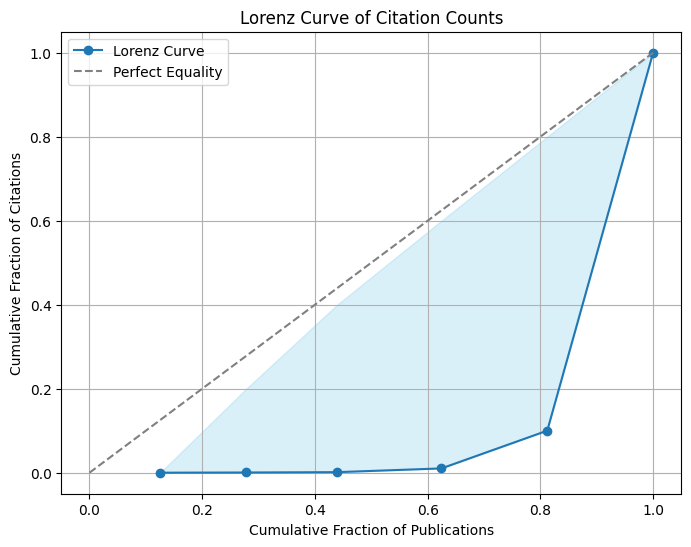

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# 引用数と対応する論文数
citation_counts = citecount
paper_counts = papers_cited

# 引用数と論文数の累積分布関数（CDF）を計算
total_papers = np.sum(paper_counts)
cumulative_papers = np.cumsum(paper_counts) / total_papers

total_citation = np.sum(citation_counts)
cumulative_citation = np.cumsum(citation_counts) / total_citation

cumulative_papers
cumulative_citation

# 対角線（完全均等分布）を計算
perfect_equality = np.linspace(0, 1, len(citation_counts))

# ローレンツ曲線をプロット
plt.figure(figsize=(8, 6))
plt.plot(cumulative_papers, cumulative_citation, label='Lorenz Curve', marker='o')
plt.plot(perfect_equality, perfect_equality, label='Perfect Equality', linestyle='--', color='gray')
plt.fill_between(cumulative_papers, cumulative_citation, perfect_equality, where=(cumulative_papers >= perfect_equality), color='skyblue', alpha=0.3)
plt.xlabel('Cumulative Fraction of Publications')
plt.ylabel('Cumulative Fraction of Citations')
plt.title('Lorenz Curve of Citation Counts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ある機関から出版された論文の中で引用数の多い順に文献を取得
result = Works() \
  .filter(authorships={"institutions": {"ror": "02956yf07"}}) \
  .sort(cited_by_count="desc") \
  .get()
list(map(lambda x: x["title"], result))

# 正解は筑波大

In [22]:
print(data['apc_list']) #APC(オープンアクセス出版料)

200


# 著者のデータ

In [ ]:
source = Sources().filter(works_count=">1000000").get() # 100万本以上論文が出ている論文誌を取得

pd.DataFrame(map(lambda x: [x["id"],x["display_name"], x["host_organization_name"], x["is_oa"],x["works_count"]],source),
            columns=["id","論文誌名","論文誌発行機関","OA誌かどうか", "累計論文発行数"])

# 機関データ